# Hands-on 3: Kmeans Notebook (Tutorial)
**Nombre:** Katia Alejandra Avalos Garcia  
**Profesor:** Jose Antonio Aviña Mendez <br>
**Materia:** Clasificación inteligente de datos

# 1.1  Fundamentos de la técnica
El algoritmo K-means es un método de aprendizaje no supervisado cuya función principal es el agrupamiento (clustering).

***Objetivo:*** Su función es particionar un conjunto de $n$ instancias (datos) en $K$ conjuntos disjuntos (clústeres).<br>***Mecanismo:*** Logra esto encontrando grupos de datos que son internamente semejantes y distintos entre sí.<br>***Asignación:*** Cada instancia es asignada al centroide (la media) más cercano, minimizando así la suma de las distancias al cuadrado entre cada punto y el centroide de su clúster asignado.

Se emplea K-means en este contexto como para segmentar clientes identificando patrones de comportamiento con dos variables importantes: ingreso anual y puntaje de gasto, con el objetivo de detectar perfiles de clientes con hábitos similares y aprovechar esta información para futuras estrategias, como campañas de marketing o promociones.

# 1.2  Modelo Matemático. 
La fórmula calcula la suma total de las distancias cuadradas entre cada punto y su centroide, midiendo qué tan bien agrupa el algoritmo K-Means los datos en clústeres

**Fórmula:** $$ J = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2 $$

+ $J$: Función de costo o suma total de errores dentro de los clústeres (también llamada inercia).
+ $k$: Número total de clústeres definidos en el modelo.
+ $x_j$: Un punto de datos dentro del conjunto de datos.
+ $C_i$: El clúster $i$, que contiene todos los puntos asignados a ese centro.
+ $\mu_i$: Centroide (media o punto central) del clúster $i$.
+ $| x_j - \mu_i |^2$: Distancia cuadrada euclidiana entre el punto $x_j$ y el centroide $\mu_i$.
+ $\sum_{x_j \in C_i}$: Suma de las distancias de todos los puntos dentro del clúster $i$ hacia su centroide.
+ $\sum_{i=1}^{k}$: Suma de esas distancias para todos los clústeres del modelo.


# 1.3  Descripción de la librería, clases, funciones en su respectiva sección
- **numpy:** Empleada para trabajar con vectores
    + Funciones: np.random
- **scikit-learn (sklearn):** Empleado para el algoritmo de K-Means (incluido la evaluación)
    + Funciones: KMeans, LabelEncoder, StandardScaler, silhouette_score, confusion_matrix, accuracy_score
- **matplotlib:** Ayuda a visualizar las gráficas
   + Funciones: plt.figure(), plt.title(), ply.show()
- **pandas:** Lee mi dataset, trabaja con datasets
   + Funciones: pd.read_csv()
- **seaborn** Tambien visualiza las gráficas pero en un enfoque mas estetico
   + Funciones: sns.scatterplot()


In [12]:
# Importación de librerias
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt  
import seaborn as sns           
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.cluster import KMeans                               
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score  


# 1.4. Pipeline 

***Preprocesamiento***

In [13]:
# Cargar dataset
df = pd.read_csv("Mall_Customers.csv")

# Muestra las primeras filas
print("Primeras filas del dataset:\n", df.head())

# Estadistica basica del dataset 
print("\nEstadísticas del dataset:\n", df.describe())

Primeras filas del dataset:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Estadísticas del dataset:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000

**Prediction**

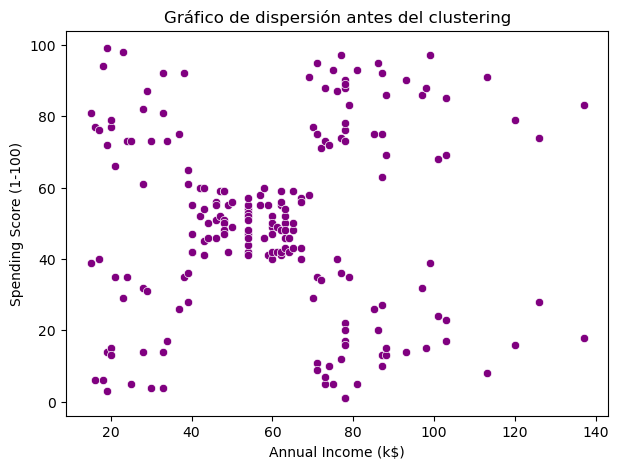

In [14]:
# Convierte las variables categ.oricas textos a numeros
#Female = 0, Male = 1
encoder = LabelEncoder()
#Ese resultado se guarda en una nueva columna
df["Gender"] = encoder.fit_transform(df["Genre"])  # Female=0, Male=1

#Se crea nmuestra variable x, los cuales son las que emplearemos de entrada para el modelo
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

#Escala los datos, con una desviacion de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Es necesario escalar los datos para que todas las variables tengan la misma importancia en el cálculo de distancias del algoritmo K-Means.

#Muestra una grafica de los datos
plt.figure(figsize=(7,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, color="purple")
plt.title("Gráfico de dispersión antes del clustering")
plt.show()

***Model Evaluation:***

In [15]:
#Meramente usado para ignorar warnings
import warnings
warnings.filterwarnings("ignore")

#5 números de clúesteres a identificar, inciializa los centroides
#Sem emplea número de iteraciones
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
#Asigna a cada cluster los datos escalados y los guarda en la columna Cluster

# Mostrar los centroides
print("\nCentroides:")
print(kmeans.cluster_centers_)




Centroides:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]



Ejemplo de predicción:
Perteneciente al cluster: 0


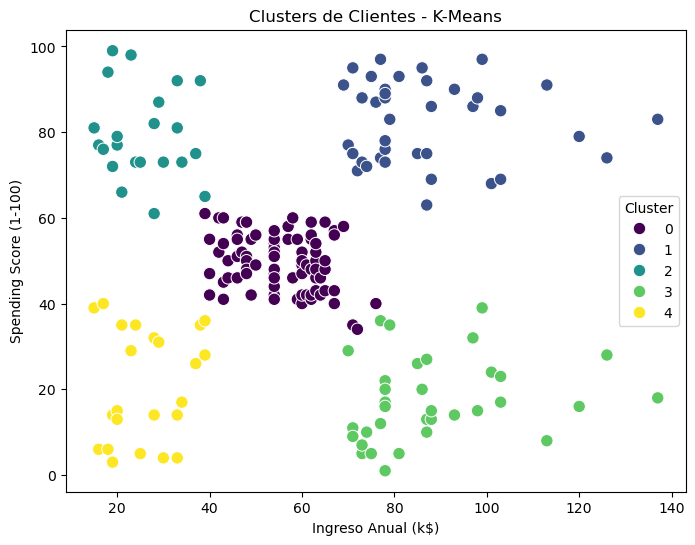

In [16]:
def predecir_cliente(ingreso, gasto):
    """
    Recibe un patrón nuevo (ingreso anual y puntaje de gasto)
    y devuelve el número de cluster al que pertenece.
    """
    nuevo = np.array([[ingreso, gasto]])
    nuevo_scaled = scaler.transform(nuevo)
    cluster_predicho = kmeans.predict(nuevo_scaled)[0]
    return f"Perteneciente al cluster: {cluster_predicho}"

# Ejemplo de predicción
print("\nEjemplo de predicción:")
print(predecir_cliente(60, 50))

#Imprimir gráfica
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="viridis",
    s=80
)
plt.title("Clusters de Clientes - K-Means")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

+ Matriz de Confusión

In [17]:
# Matriz de silhouette: mide que tan separados esran los clusteres, basicamente "su calidad"
sil_score = silhouette_score(X_scaled, df["Cluster"])
print(f"\nSilhouette Score (cohesión/separación del modelo): {sil_score:.3f}")

# Matriz de confusión (Compara la prediccion y el valor real)
cm = confusion_matrix(df["Gender"], df["Cluster"] % 2)
print("\nMatriz de Confusión:")
print(cm)



Silhouette Score (cohesión/separación del modelo): 0.555

Matriz de Confusión:
[[75 37]
 [51 37]]


+ Accuracy

In [10]:
#Calcula qué proporción de puntos coinciden entre los clústeres asignados y el género real, mostrando un accuracy comparativo entre ambos
acc = accuracy_score(df["Gender"], df["Cluster"] % 2)
print(f"Accuracy (comparativo por género): {acc:.3f}")


Accuracy (comparativo por género): 0.560


# Referencias Biliograficas:
***Azmoudeh, A. (n.d.). Airbnb Open Data [Dataset]. Kaggle. https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata***

***Web, W. D. (2025, 24 abril). Ejemplo práctico de K Means en análisis de datos. Wolf Diseño Web. https://wolfdisenoweb.com/2025/04/24/k-means-ejemplo/***

***Ramírez, L. (2024, 30 octubre). Algoritmo k-means: ¿Qué es y cómo funciona? Thinking For Innovation. https://www.iebschool.com/hub/algoritmo-k-means-que-es-y-como-funciona-big-data/***